In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Change this path if needed
df = pd.read_csv('indian_liver_patient.csv')

df.columns = df.columns.str.strip()  # Clean column names

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
display(df.head(3))
print("\nInfo:")
df.info()
print("\nMissing values:")
print(df.isna().sum())

Shape: (583, 11)

Columns:
['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1



Info:
<class 'pandas.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    str    
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), str(1)
memory usage: 50.2 KB

Missing values:
Age                           0
Gender                        0
Total_Bilirubin   

In [3]:
# Fill missing values
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(
    df['Albumin_and_Globulin_Ratio'].median()
)

# Encode Gender (Male=1, Female=0 or vice versa)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Rename and map target: 1 = Liver Disease, 0 = Healthy
df = df.rename(columns={'Dataset': 'LiverDisease'})
df['LiverDisease'] = df['LiverDisease'].map({1: 1, 2: 0})

print("Class distribution:")
print(df['LiverDisease'].value_counts(normalize=True).round(3))

Class distribution:
LiverDisease
1    0.714
0    0.286
Name: proportion, dtype: float64


In [4]:
X = df.drop('LiverDisease', axis=1)
y = df['LiverDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y  # Maintains class balance
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set:", X_train_scaled.shape)
print("Test set    :", X_test_scaled.shape)

Training set: (437, 10)
Test set    : (146, 10)


In [5]:
model = SVC(
    kernel='linear',  # Linear kernel as requested
    C=1.0,            # Regularization parameter (tune if needed)
    class_weight='balanced',  # Handles class imbalance
    random_state=42,
    probability=True  # For ROC probabilities
)

model.fit(X_train_scaled, y_train)

print("Model trained.")

Model trained.


Accuracy : 0.6644

Classification Report:
               precision    recall  f1-score   support

      Healthy       0.46      0.93      0.61        42
Liver Disease       0.95      0.56      0.70       104

     accuracy                           0.66       146
    macro avg       0.70      0.74      0.66       146
 weighted avg       0.81      0.66      0.68       146


Confusion Matrix:


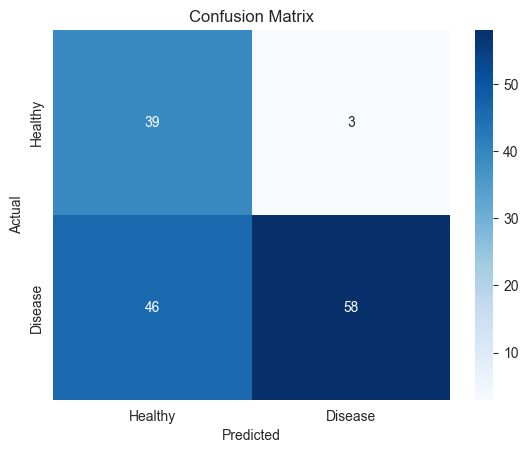

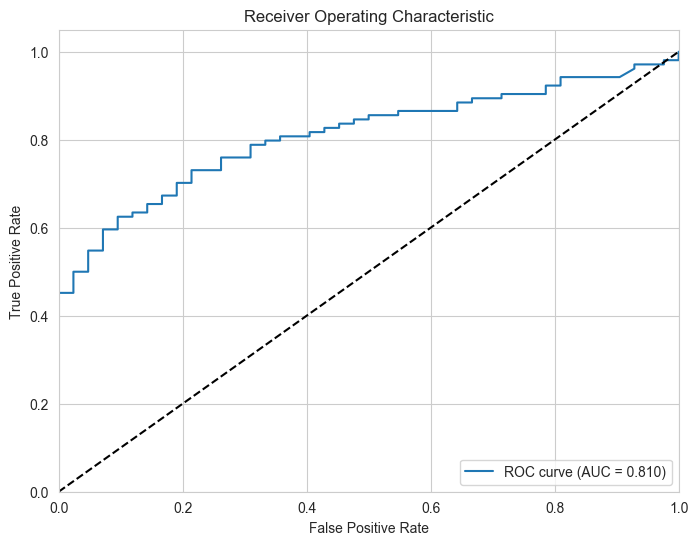

In [6]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Liver Disease']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

C:\Users\PredatorNeo\AppData\Local\Temp\ipykernel_17568\2311687177.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette='viridis')


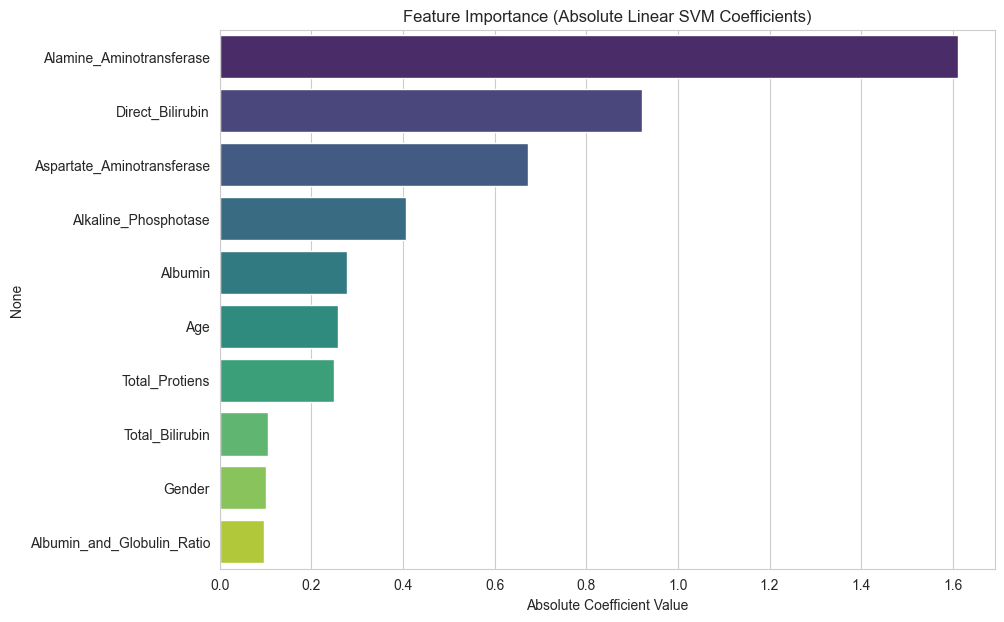

Alamine_Aminotransferase      1.6109
Direct_Bilirubin              0.9216
Aspartate_Aminotransferase    0.6720
Alkaline_Phosphotase          0.4070
Albumin                       0.2768
Age                           0.2581
Total_Protiens                0.2493
Total_Bilirubin               0.1048
Gender                        0.1000
Albumin_and_Globulin_Ratio    0.0966
dtype: float64


In [7]:
coef = np.abs(model.coef_[0])
features = X.columns

imp = pd.Series(coef, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=imp.values, y=imp.index, palette='viridis')
plt.title('Feature Importance (Absolute Linear SVM Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

print(imp.round(4))

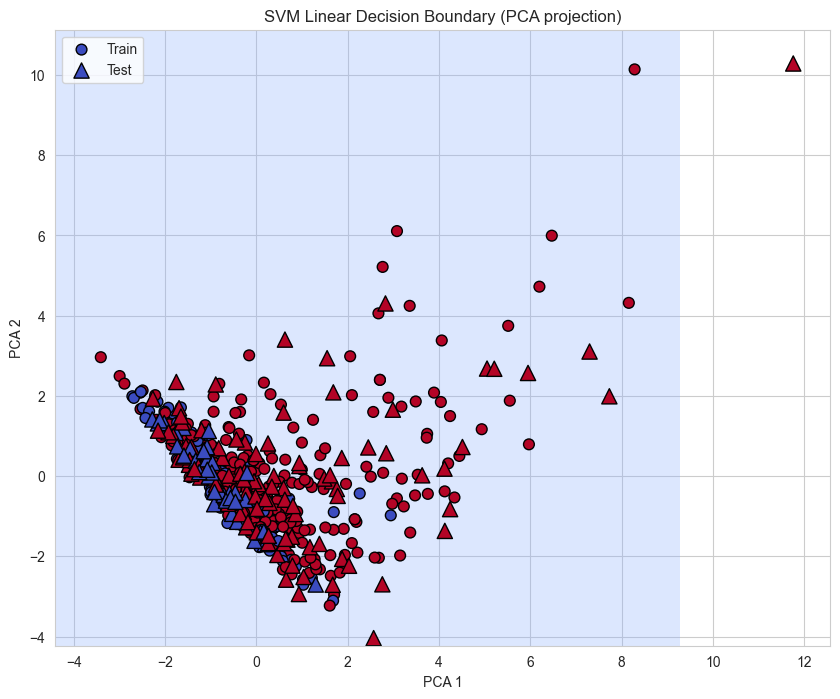

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train new model on 2D data for plotting
model_2d = SVC(kernel='linear', C=1.0)
model_2d.fit(X_train_pca, y_train)

# Mesh grid
h = 0.02
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, edgecolor='k',
            cmap='coolwarm', s=60, label='Train')
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, marker='^', edgecolor='k',
            cmap='coolwarm', s=120, label='Test')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Linear Decision Boundary (PCA projection)')
plt.legend()
plt.show()